In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
import math

import pandas as pd

In [2]:
df = pd.read_csv("plot_df_encoding.csv")

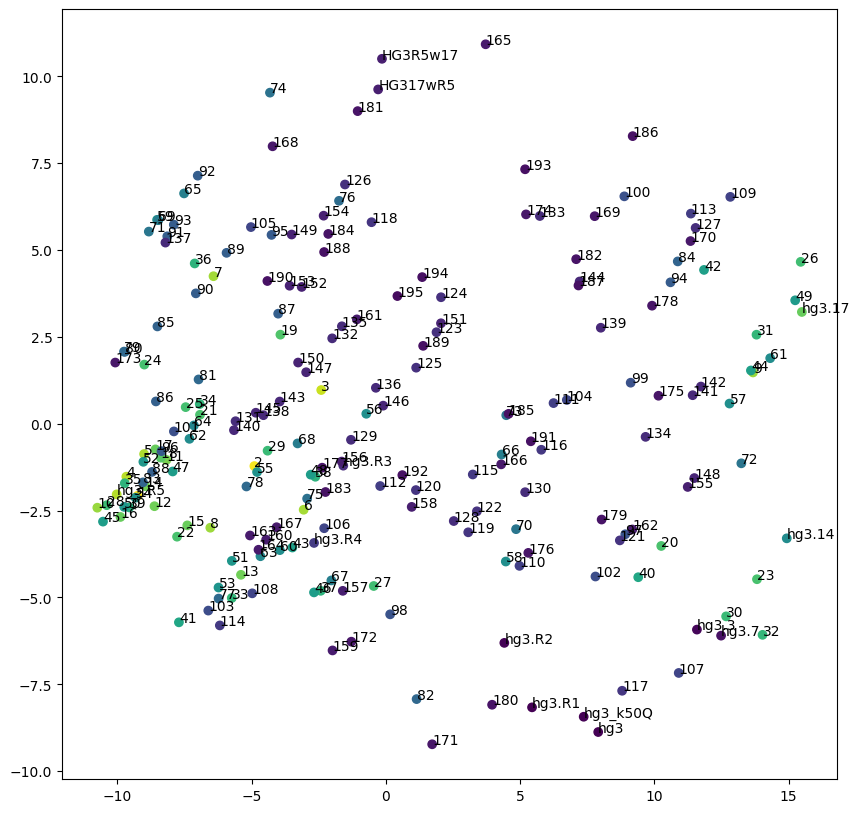

In [3]:
plt.figure(figsize=(10, 10))
plt.scatter(df.x, df.y, c = df.activity)

for idx, row in df.iterrows():
    if row.activity > 0:
        plt.annotate(row.names, (row.x, row.y))

In [4]:
x, y, z = df.x, df.y, df.activity

In [5]:
pnts_x = []
pnts_y = []
pnts_z = []


offset = 10
for outer in range(int(x.min() -offset), int(x.max() + offset), 1):
    for inner in range(int(y.min() - offset), int(y.max() + offset), 1):
        distances = [math.dist((p), (outer, inner)) for p in zip(df.x, df.y)]
        if np.array(distances).min() > 6:
            pnts_x.append(outer)
            pnts_y.append(inner)
            pnts_z.append(0)

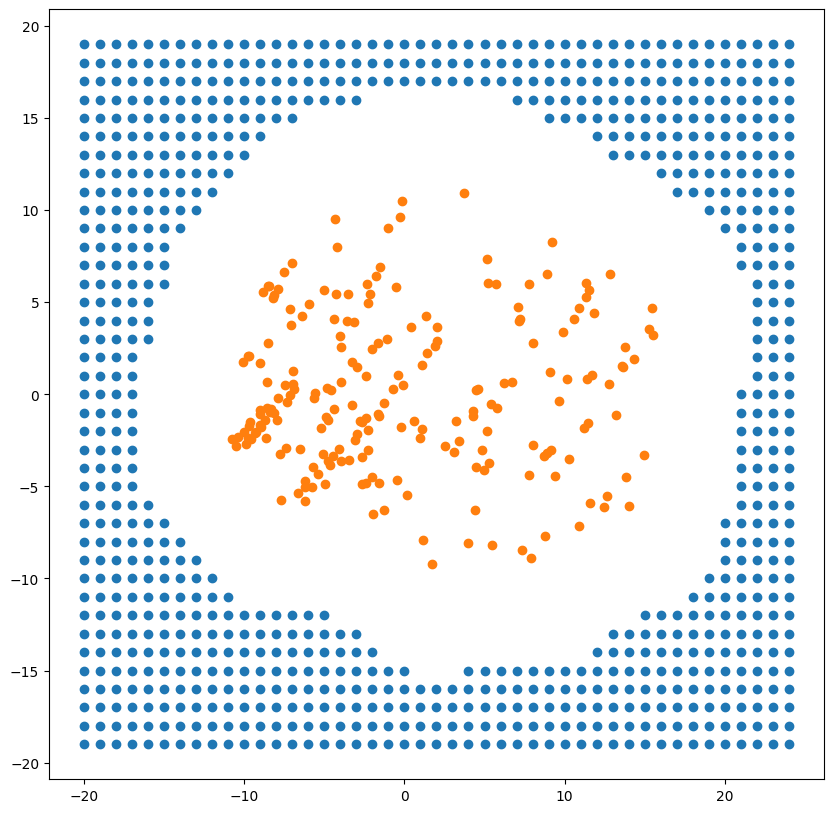

In [6]:
plt.figure(figsize=(10,10))
plt.scatter(pnts_x, pnts_y)
plt.scatter(df.x, df.y)
plt.show()

In [7]:
x = np.concatenate([x,pnts_x ])
y = np.concatenate([y,pnts_y ])
z = np.concatenate([z,pnts_z ])

In [8]:
df[:13]

,names,seq,activity,x,y
0,hg3,MAEAAQSVDQLIKARGKVYFGVATDQNRLTTGKNAAIIQADFGMVW...,0.002183,7.907337,-8.872917
1,hg3_k50Q,MAEAAQSVDQLIKARGKVYFGVATDQNRLTTGKNAAIIQADFGMVW...,0.005459,7.366654,-8.432794
2,hg3.3,MAEAAQSIDQLIKARGKVYFGVATDQNRLTTGKNAAIIQADFGMVW...,0.017467,11.584369,-5.924250
3,hg3.7,MAEAAQSIDQLIKARGKVYFGVATDQNRLTTGKNAAIIKADFGMVW...,0.054585,12.484444,-6.098340
4,hg3.14,MAEAAQSIDQLIKARGKVYFGVATDQNRLTTGKNAAIIKADFGMVW...,0.545852,14.930947,-3.297283
5,hg3.17,MAEAAQSIDQLIKARGKVYFGVATDQNRLTTGKNAAIIKADFGMVW...,0.864629,15.494053,3.219539
6,hg3.R1,MAEAAQSVDQLIKARGKVYFGVATDQNRLTTGKNAAIIQADFGMVW...,0.006550,5.442122,-8.162498
7,hg3.R2,MAEAAQSVDQLIKARGKVYFGVATDQNRLTTGKNAAIIQADFGMVW...,0.010917,4.410214,-6.306804
8,hg3.R3,MAEAAQSVDQLIKARGKVYFGVATDQNRLTTGKNAAIIQADFGMVW...,0.144105,-1.589025,-1.204936
9,hg3.R4,MAEAAQSVDQLMKARGKVYFGVATDQNRLTTGKNAAIIQADFGMVW...,0.198690,-2.678081,-3.429647


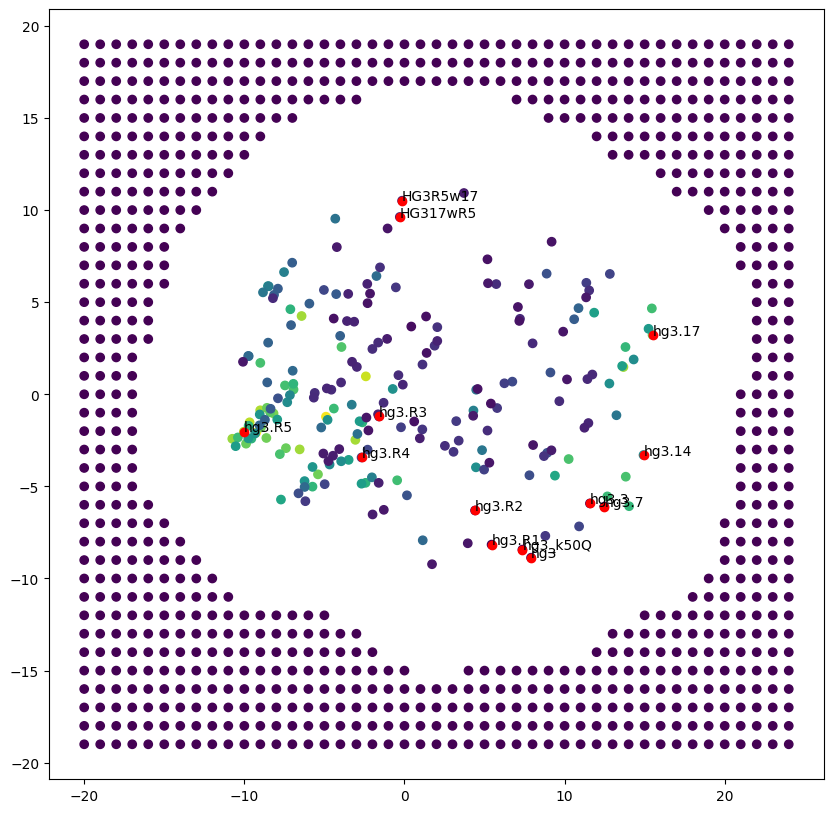

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(x, y, c = z)

plt.scatter(df[:13].x, df[:13].y, c = "red")

for _, row in df[:13].iterrows():
    plt.annotate(row.names, (row.x, row.y ))
plt.show()

In [10]:
from scipy import ndimage, datasets

In [11]:
z = z / z.max()

0.8163547235256488


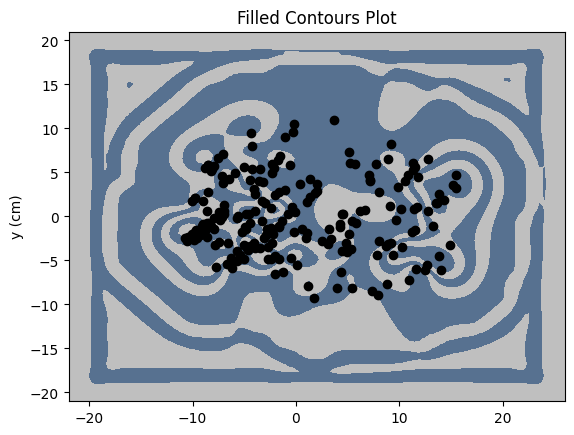

In [12]:
import numpy as np
import scipy.interpolate
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

np.random.seed(1977)
# Define the colors for the gradient (start and end)
colors = ["#bfbfbf", "#577190"]

# Create a new colormap
cmap_name = 'my_gradient'
my_cmap = LinearSegmentedColormap.from_list(cmap_name, colors)

#x, y, z = np.random.random((3, 10))

#interp = scipy.interpolate.Rbf(x[:limit]  + np.random.rand(limit) / 100, y[:limit] + np.random.rand(limit) / 100, z[:limit] + np.random.rand(limit))
yi, xi = np.mgrid[y.min() - 2:y.max() + 2:100j, x.min()-2:x.max() + 2:100j]
#interp = scipy.interpolate.Rbf(x  + np.random.rand(*x.shape) / 100, y + np.random.rand(*y.shape) / 100, newz)
interp = scipy.interpolate.Rbf(x, y, z, smooth=0.1)

zi = interp(xi, yi) 
print(zi.max())
# zi = zi / zi.max()
nzi = ndimage.uniform_filter(zi, size=7, mode='constant')

fig,ax=plt.subplots(1,1)
ax.plot(x[:-len(pnts_x)], y[:-len(pnts_y)], "ko")
# ax.plot(x[:len(activities_our_variants)], y[:len(activities_our_variants)],"ko", c = "red")


# ax.plot(pnts_x, pnts_y, "ko", color="red")
cp = ax.contourf(xi, yi, zi,colors=colors)
# fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
#ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
plt.show()

In [13]:
#interp = scipy.interpolate.Rbf(x[:limit]  + np.random.rand(limit) / 100, y[:limit] + np.random.rand(limit) / 100, z[:limit] + np.random.rand(limit))
yi, xi = np.mgrid[y.min() - 2:y.max() + 2:100j, x.min()-2:x.max() + 2:100j]
#interp = scipy.interpolate.Rbf(x  + np.random.rand(*x.shape) / 100, y + np.random.rand(*y.shape) / 100, newz)
interp = scipy.interpolate.Rbf(x, y, z, smooth=0.1)

zi = interp(xi, yi) 

In [14]:
#interp = scipy.interpolate.Rbf(x[:limit]  + np.random.rand(limit) / 100, y[:limit] + np.random.rand(limit) / 100, z[:limit] + np.random.rand(limit))
yi, xi = np.mgrid[y.min() - 2:y.max() + 2:100j, x.min()-2:x.max() + 2:100j]
#interp = scipy.interpolate.Rbf(x  + np.random.rand(*x.shape) / 100, y + np.random.rand(*y.shape) / 100, newz)
interp = scipy.interpolate.Rbf(x, y, z, smooth=0.1)

zi = interp(xi, yi) 

# Define the colors for the gradient (start and end)
colors_us = ["#f0f0f0", "#577190"]
colors_17 = ["#f0f0f0", "#7e689c"] #d4d4d4 , ebebeb

cmap_us = LinearSegmentedColormap.from_list("us", colors_us)
cmap_17 = LinearSegmentedColormap.from_list("17", colors_17)

# Function to calculate color based on x and z
xmin, xmax = xi.min(), xi.max()
def calculate_color(x, z):
    color_us = cmap_us(z)
    color_17 = cmap_17(z)
    
    colors_between = LinearSegmentedColormap.from_list("btw", [color_us, color_17])
    x_normalized = (x - xmin) / (xmax - xmin)
    
    return colors_between(x_normalized)

colors = np.empty(xi.shape, dtype=object)
for i in range(xi.shape[0]):
    for j in range(xi.shape[1]):
        colors[i, j] = calculate_color(xi[i, j], zi[i, j])

In [15]:
wt_gray = "#6b6b6b"
k50q = "#468978"
hgr5  = "#577190"
hgr17 = "#57417a"

idx_to_color = {
    0: wt_gray,
    1: k50q,
    2: hgr17,
    3: hgr17,
    4: hgr17,
    5: hgr17,
    6: hgr5,
    7: hgr5,
    8: hgr5,
    9: hgr5,
    10: hgr5,
    11: k50q,
    12: k50q,
}

In [16]:
#interp = scipy.interpolate.Rbf(x[:limit]  + np.random.rand(limit) / 100, y[:limit] + np.random.rand(limit) / 100, z[:limit] + np.random.rand(limit))
yi, xi = np.mgrid[y.min() - 2:y.max() + 2:100j, x.min()-2:x.max() + 2:100j]
#interp = scipy.interpolate.Rbf(x  + np.random.rand(*x.shape) / 100, y + np.random.rand(*y.shape) / 100, newz)
interp = scipy.interpolate.Rbf(x, y, z, smooth=0.35)

zi = interp(xi, yi) 
zi = np.maximum(zi, 0)
nzi = ndimage.uniform_filter(zi, size=2, mode='constant')
nzi = np.maximum(nzi, 0)

# Define the colors for the gradient (start and end)
colors_us = ["#f0f0f0", "#577190"]
colors_17 = ["#f0f0f0", "#7e689c"] #d4d4d4 , ebebeb

cmap_us = LinearSegmentedColormap.from_list("us", colors_us)
cmap_17 = LinearSegmentedColormap.from_list("17", colors_17)

# Function to calculate color based on x and z
xmin, xmax = xi.min(), xi.max()
def calculate_color(x, z):
    color_us = cmap_us(z)
    color_17 = cmap_17(z)
    
    colors_between = LinearSegmentedColormap.from_list("btw", [color_us, color_17])
    x_normalized = (x - xmin) / (xmax - xmin)
    
    return colors_between(x_normalized)

colors = np.empty(xi.shape, dtype=object)
for i in range(xi.shape[0]):
    for j in range(xi.shape[1]):
        colors[i, j] = calculate_color(xi[i, j], zi[i, j])

/var/folders/j4/wd353jkd6h1c_w55wqrzkgjc4ljmcm/T/ipykernel_2316/1567813699.py:51: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  ax.plot(


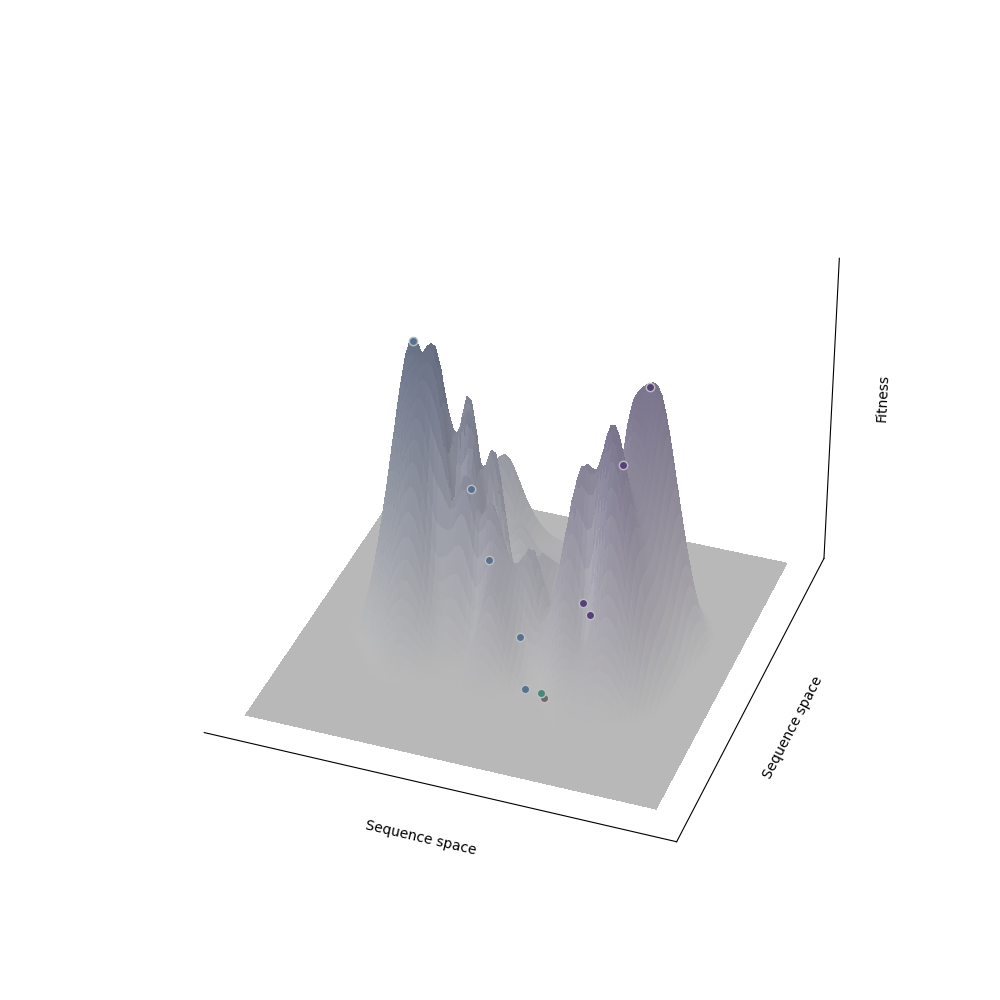

In [17]:
%matplotlib widget
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define the colors for the gradient (start and end)
# colors = ["#6b6b6b", "#c2ccd9"]

# Create a new colormap
# cmap_name = 'my_gradient'
# my_cmap = LinearSegmentedColormap.from_list(cmap_name, colors)

measured_x = x#x[:-len(pnts_x)]
measured_y = y#y[:-len(pnts_y)]
measured_z = z#z[:-len(pnts_z)]

fig = plt.figure(figsize=(10, 10))


ax = plt.axes(projection='3d')
ax.plot_surface(xi , yi  , nzi,
                facecolors=colors,
                rstride=1, cstride=1,alpha=1, edgecolor="none", linewidth=0, antialiased=False, zorder=1)


x_y_arr = np.stack([xi.flatten(), yi.flatten()],axis=1)

for idx, row in  df[:11].iterrows():  
    point_x = row.x#measured_x[idx]
    point_y = row.y#measured_y[idx]
    #point_z = row.activity  #interp([point_x], [point_y]) 
    point = [point_x, point_y]
    # Calculate distances
    distances = np.sqrt(np.sum((x_y_arr - point) ** 2, axis=1))
    
    # Find index of the minimum distance
    closest_point_index = np.argmin(distances)
    
    point_x = xi.flatten()[closest_point_index]
    point_y = yi.flatten()[closest_point_index]
    point_z = nzi.flatten()[closest_point_index]

    if point_z < 0.1:
        point_z = row.activity
    
    point_color = idx_to_color[idx]
    # print(row.names, point_z)
    ax.plot(
        [point_x],
        [point_y],
        [point_z],
        'ko',
        color=point_color,
        markeredgecolor="#bfbfbf",
        # linewidth=2,
        # alpha=1,
        zorder=5
       ) 

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.set_xlabel("Sequence space")
ax.set_ylabel("Sequence space")
ax.set_zlabel("Fitness")
# noise = np.random.rand(100,100) * 0
# noise[zi < 0.2] = 0
# ax.plot_surface(xi , yi  , zi,cmap="plasma", rstride=1, cstride=1,alpha=1, edgecolor="none", linewidth=0, antialiased=False)
# [55_290]


ax.view_init(elev=35, azim=290)  # `elev` is the elevation angle in the z plane, `azim` is the azimuth angle in the x,y plane
plt.show()

#ax.set_title('Surface plot')
#ax.set_axis_off()
# plt.savefig('full_img_peaks_brighter_new_sequence_space.png', transparent=True, dpi=300)

#plt.savefig('full_img_peaks_brighter_new_sequence_space.svg', transparent=True, dpi=300)
# plt.show()

In [18]:
# Define the colors for the gradient (start and end)
colors_us = ["#f0f0f0", "#577190"]
colors_17 = ["#f0f0f0", "#7e689c"]

cmap_us = LinearSegmentedColormap.from_list("us", colors_us)
cmap_17 = LinearSegmentedColormap.from_list("17", colors_17)

# Function to calculate color based on x and z
xmin, xmax = xi.min(), xi.max()
def calculate_color(x, z):
    color_us = cmap_us(z)
    color_17 = cmap_17(z)
    
    colors_between = LinearSegmentedColormap.from_list("btw", [color_us, color_17])
    x_normalized = (x - xmin) / (xmax - xmin)
    
    return colors_between(x_normalized)

colors = np.empty(xi.shape, dtype=object)
for i in range(xi.shape[0]):
    for j in range(xi.shape[1]):
        colors[i, j] = calculate_color(xi[i, j], zi[i, j])

In [19]:
wt_gray = "#6b6b6b"
k50q = "#468978"
hgr5  = "#577190"
hgr17 = "#57417a"

idx_to_color = {
    0: wt_gray,
    1: k50q,
    2: hgr17,
    3: hgr17,
    4: hgr17,
    5: hgr17,
    6: hgr5,
    7: hgr5,
    8: hgr5,
    9: hgr5,
    10: hgr5,
    11: k50q,
    12: k50q,
}

/var/folders/j4/wd353jkd6h1c_w55wqrzkgjc4ljmcm/T/ipykernel_2316/3315591158.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  plt.plot(


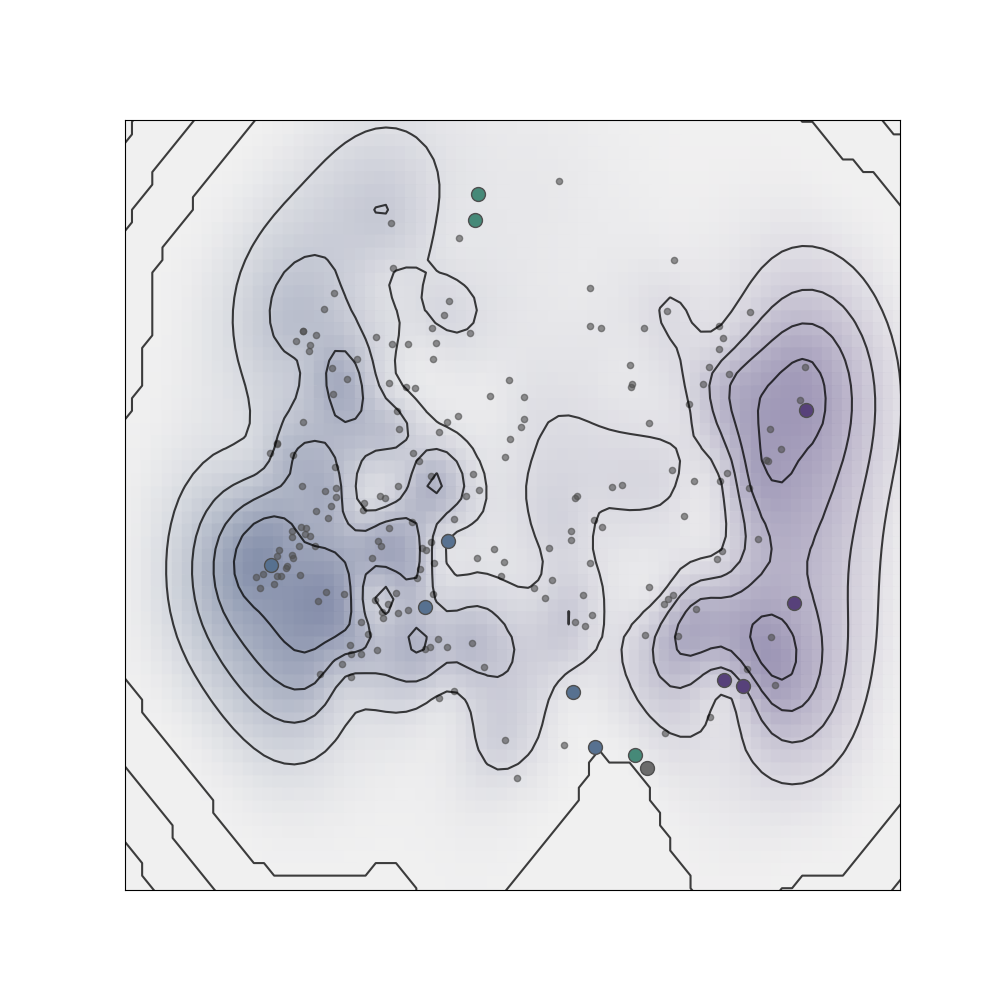

In [20]:
plt.figure(figsize=(10, 10))


nzi = ndimage.uniform_filter(zi, size=2, mode='constant')

contour = plt.contour(xi, yi, zi, levels=5, colors='black', linewidths=1.5, alpha=0.75)

plt.scatter(xi.flatten(), yi.flatten(), color=colors.flatten(), s = 250, alpha=1, marker="s")
plt.scatter(df.x, df.y, color="#4f4f4f", alpha=0.6, s =20)

x_y_arr = np.stack([xi.flatten(), yi.flatten()],axis=1)

for idx, row in  df[:13].iterrows():  
    point_x = row.x#measured_x[idx]
    point_y = row.y#measured_y[idx]
    point_color = idx_to_color[idx]

    plt.plot(
        [point_x],
        [point_y],
        'ko',
        color=point_color,
        markeredgecolor="#4f4f4f",
        markersize=10,
        # linewidth=2,
        # alpha=1,
       ) 


plt.xticks([])
plt.yticks([])
plt.ylim(-13, 13)
plt.xlim(-17, 20)

# plt.savefig("contour_brighter.png_new_sequence_space.png", dpi=300)
plt.savefig("contour_brighter.png_new_sequence_space.svg", dpi=300)
plt.show()